<a href="https://colab.research.google.com/github/Tarinibo/Cognifyz-project-/blob/main/CognifyzLEVEL3_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LEVEL 3: TASK 2

## Task: Customer Preference Analysis
- [ ] Analyze the relationship between the type of cuisine and the restaurant's rating.
- [ ] Identify the most popular cuisines among customers based on the number of votes.
- [ ] Determine if there are any specific cuisines that tend to receive higher ratings.

In [4]:
df = pd.read_csv("/content/drive/Othercomputers/My Laptop/Desktop/Dataset.csv")

## Analyze the relationship between the type of cuisine and the restaurant's rating.

In [5]:
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Display top cuisines with highest ratings
print(cuisine_ratings.head(10))

                      Cuisines  Aggregate rating
1062             Italian, Deli               4.9
949          Hawaiian, Seafood               4.9
93     American, Sandwich, Tea               4.9
683        Continental, Indian               4.9
796    European, Asian, Indian               4.9
803     European, Contemporary               4.9
808           European, German               4.9
169   BBQ, Breakfast, Southern               4.9
41    American, Coffee and Tea               4.9
1779         Sunda, Indonesian               4.9


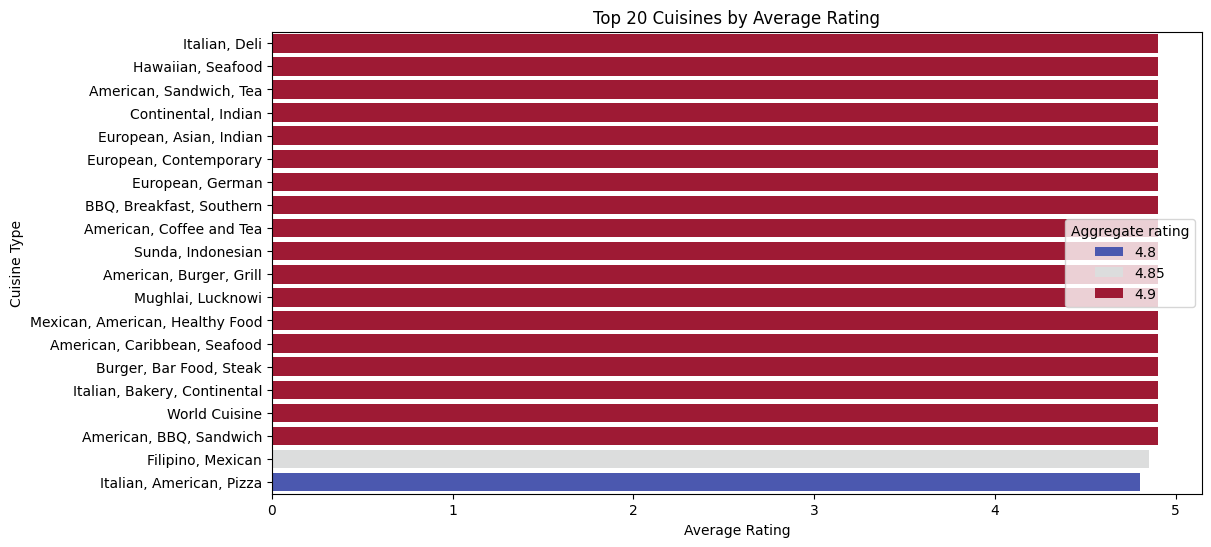

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cuisine_ratings.head(20), x='Aggregate rating', hue='Aggregate rating', y='Cuisines', palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 20 Cuisines by Average Rating')
plt.show()

In [7]:
# Encode cuisines as categorical variables
df_encoded = pd.get_dummies(df['Cuisines'])
df_encoded['Aggregate rating'] = df['Aggregate rating']

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Extract correlation of cuisines with ratings
cuisine_correlation = correlation_matrix['Aggregate rating'].drop('Aggregate rating').sort_values(ascending=False)
print(cuisine_correlation.head(10))  # Top correlated cuisines

Italian                        0.049284
Indian                         0.045383
Japanese, Sushi                0.039492
Mexican                        0.039339
Thai                           0.038730
American                       0.037685
Bakery, Desserts, Fast Food    0.037634
Modern Indian                  0.037602
Fast Food, Burger              0.037338
Seafood                        0.036586
Name: Aggregate rating, dtype: float64


## Insights:
The visualization shows which cuisines have the highest-rated restaurants. The correlation matrix identifies which cuisine types have the strongest positive/negative impact on ratings. cuisine has a high correlation with ratings, it suggests that customers generally rate restaurants offering that cuisine more favorably

## Identify the most popular cuisines among customers based on the number of votes.

In [8]:
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().reset_index()
cuisine_votes = cuisine_votes.sort_values(by='Votes', ascending=False)

# Display the top 10 most popular cuisines
print(cuisine_votes.head(10))

                            Cuisines  Votes
1514           North Indian, Mughlai  53747
1306                    North Indian  46241
1329           North Indian, Chinese  42012
331                             Cafe  30657
497                          Chinese  21925
1520  North Indian, Mughlai, Chinese  20115
828                        Fast Food  17852
1699                    South Indian  16433
1288           Mughlai, North Indian  15275
1031                         Italian  14799


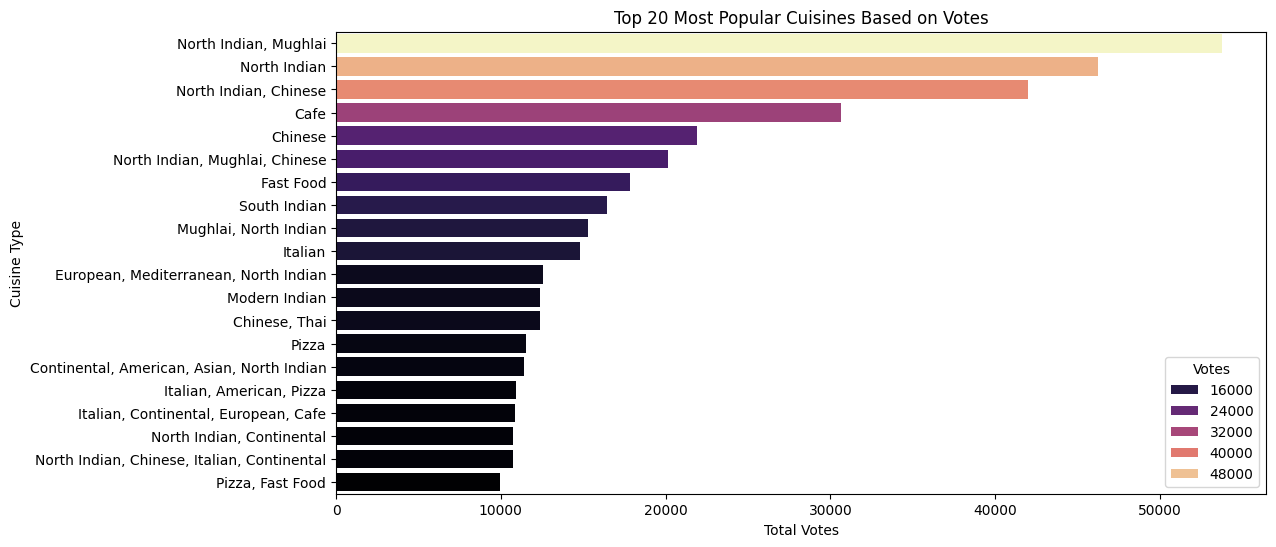

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cuisine_votes.head(20), x='Votes', y='Cuisines', hue='Votes', palette='magma')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine Type')
plt.title('Top 20 Most Popular Cuisines Based on Votes')
plt.show()

## Determine if there are any specific cuisines that tend to receive higher ratings.

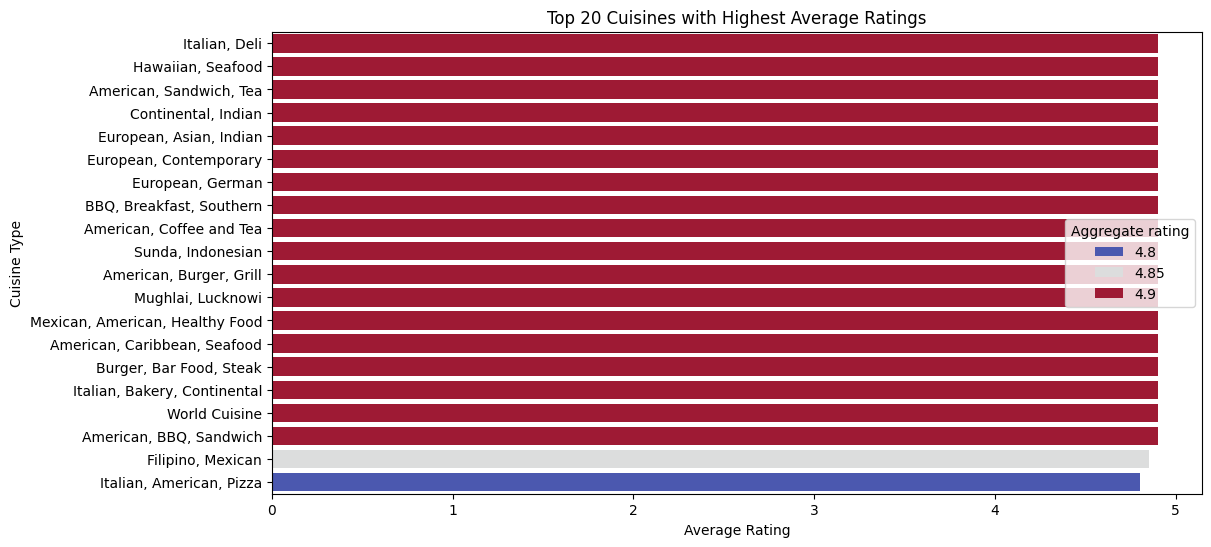

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cuisine_ratings.head(20), x='Aggregate rating', y='Cuisines', hue='Aggregate rating', palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 20 Cuisines with Highest Average Ratings')
plt.show()